# PIZZA_SALES_ANALYSIS_PROJECT

# Importing Libraries and Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pizza_sales.csv')

In [5]:
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  01-01-2015   11:38:36   
1         2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2         3         2  five_cheese_l         1  01-01-2015   11:57:40   
3         4         2    ital_supr_l         1  01-01-2015   11:57:40   
4         5         2     mexicana_m         1  01-01-2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   


 # Basic Data Exploration

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None


In [9]:
print(df.describe())

           pizza_id      order_id      quantity    unit_price   total_price
count  48620.000000  48620.000000  48620.000000  48620.000000  48620.000000
mean   24310.500000  10701.479761      1.019622     16.494132     16.821474
std    14035.529381   6180.119770      0.143077      3.621789      4.437398
min        1.000000      1.000000      1.000000      9.750000      9.750000
25%    12155.750000   5337.000000      1.000000     12.750000     12.750000
50%    24310.500000  10682.500000      1.000000     16.500000     16.500000
75%    36465.250000  16100.000000      1.000000     20.250000     20.500000
max    48620.000000  21350.000000      4.000000     35.950000     83.000000


In [11]:
print(df.isnull().sum())

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64


In [19]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%Y-%M-%D')

In [23]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [28]:
print(df['order_date'])

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]


In [25]:
daily_sales = df.groupby('order_date')['total_price'].sum()

In [27]:
print(daily_sales)

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64


# Sales Trends Over Time

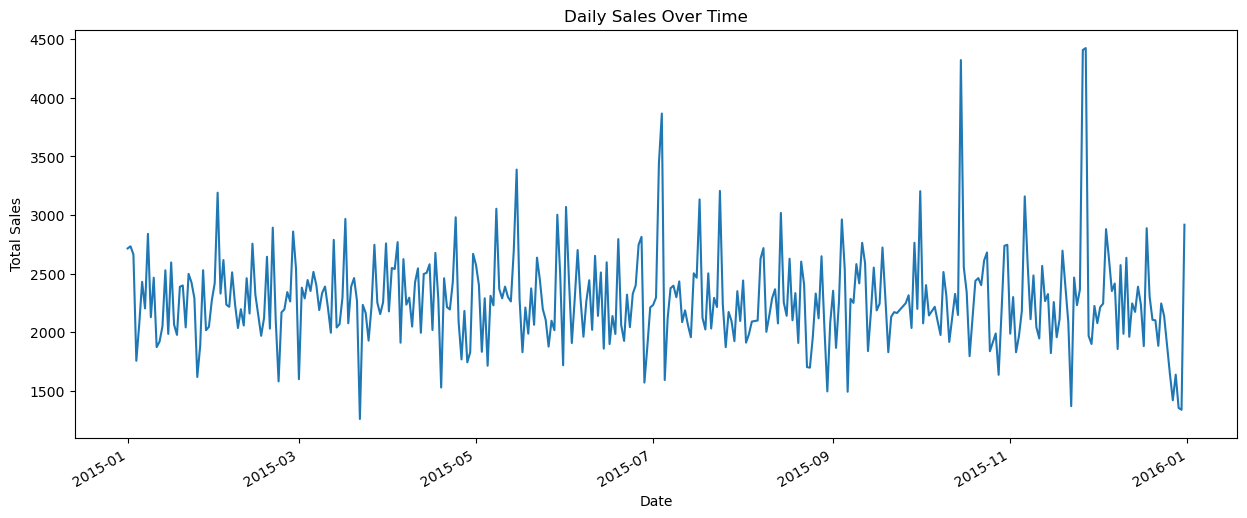

In [31]:
# Plot daily sales
plt.figure(figsize=(15, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Popular Pizza Categories

In [33]:
category_counts = df['pizza_category'].value_counts()

In [37]:
print(category_counts)

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64


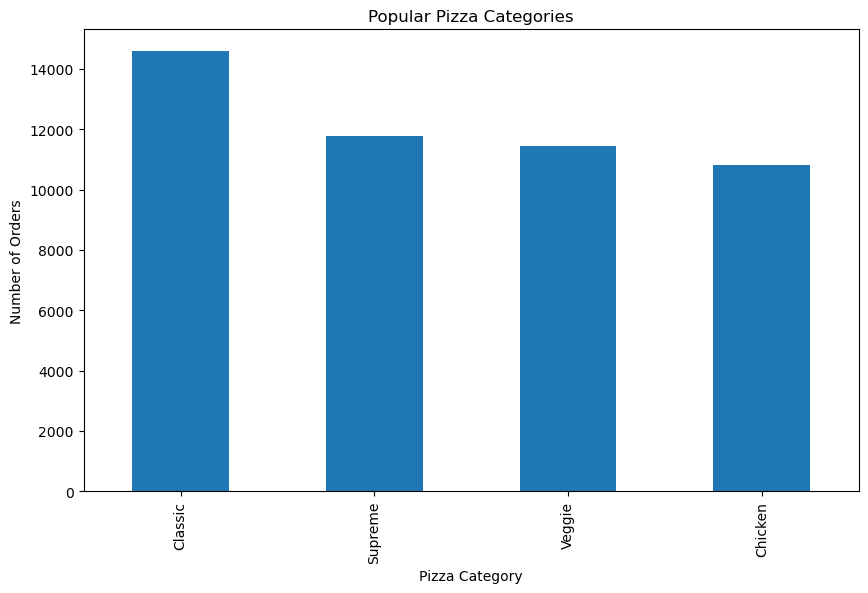

In [35]:
# Plot the results
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Popular Pizza Categories')
plt.xlabel('Pizza Category')
plt.ylabel('Number of Orders')
plt.show()

# Pizza Size Preferences

In [38]:
size_counts = df['pizza_size'].value_counts()

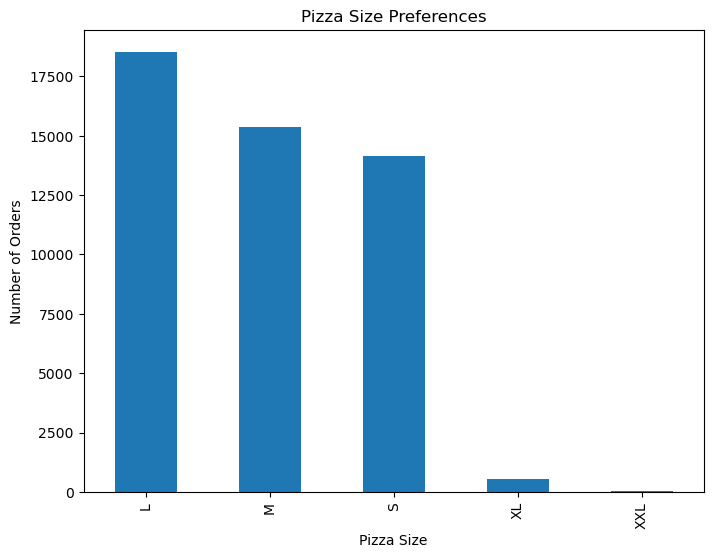

In [40]:
plt.figure(figsize=(8, 6))
size_counts.plot(kind='bar')
plt.title('Pizza Size Preferences')
plt.xlabel('Pizza Size')
plt.ylabel('Number of Orders')
plt.show()

# Top-Selling Pizzas

In [45]:
top_pizzas = df['pizza_name'].value_counts().head(10)

In [47]:
print(top_pizzas)

pizza_name
The Classic Deluxe Pizza        2416
The Barbecue Chicken Pizza      2372
The Hawaiian Pizza              2370
The Pepperoni Pizza             2369
The Thai Chicken Pizza          2315
The California Chicken Pizza    2302
The Sicilian Pizza              1887
The Spicy Italian Pizza         1887
The Southwest Chicken Pizza     1885
The Four Cheese Pizza           1850
Name: count, dtype: int64


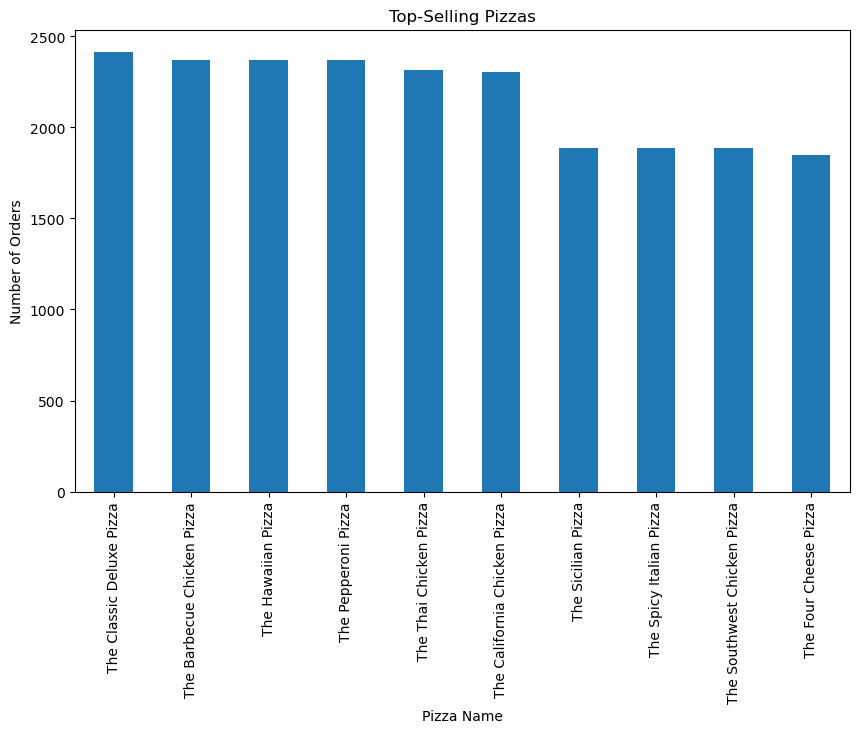

In [49]:
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='bar')
plt.title('Top-Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Number of Orders')
plt.show()

# Ingredient Analysis

In [52]:
# Split ingredients and count occurrences
from collections import Counter

In [54]:
ingredients = df['pizza_ingredients'].str.split(', ').explode()
ingredient_counts = Counter(ingredients)

In [56]:
# Convert to DataFrame for easier plotting
ingredient_df = pd.DataFrame(ingredient_counts.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False).head(10)

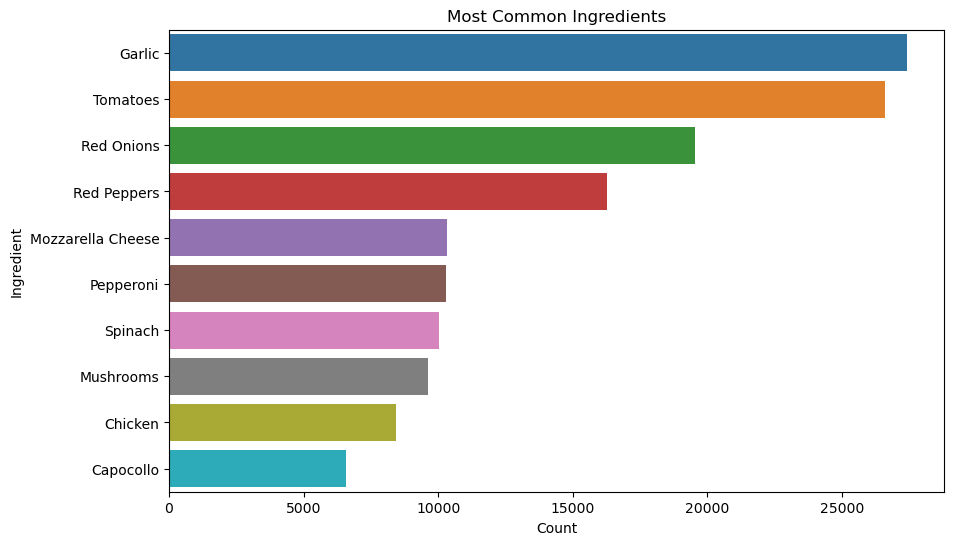

In [58]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Ingredient', data=ingredient_df)
plt.title('Most Common Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()

# Order Composition

In [61]:
# Group by order_id and calculate total quantity and price
order_summary = df.groupby('order_id').agg({'quantity': 'sum', 'total_price': 'sum'})

In [63]:
# Calculate average order size and value
avg_order_size = order_summary['quantity'].mean()
avg_order_value = order_summary['total_price'].mean()


In [65]:
print(f'Average Order Size: {avg_order_size}')
print(f'Average Order Value: {avg_order_value}')

Average Order Size: 2.321967213114754
Average Order Value: 38.30726229508196


# Customer Preferences

In [68]:
# Group by pizza_name and pizza_ingredients to find popular combinations
popular_combinations = df.groupby(['pizza_name', 'pizza_ingredients']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

In [70]:
print(popular_combinations)

                      pizza_name  \
7       The Classic Deluxe Pizza   
0     The Barbecue Chicken Pizza   
12            The Hawaiian Pizza   
20           The Pepperoni Pizza   
30        The Thai Chicken Pizza   
4   The California Chicken Pizza   
26       The Spicy Italian Pizza   
23            The Sicilian Pizza   
25   The Southwest Chicken Pizza   
9          The Four Cheese Pizza   

                                    pizza_ingredients  Count  
7   Pepperoni, Mushrooms, Red Onions, Red Peppers,...   2416  
0   Barbecued Chicken, Red Peppers, Green Peppers,...   2372  
12           Sliced Ham, Pineapple, Mozzarella Cheese   2370  
20                       Mozzarella Cheese, Pepperoni   2369  
30  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...   2315  
4   Chicken, Artichoke, Spinach, Garlic, Jalapeno ...   2302  
26  Capocollo, Tomatoes, Goat Cheese, Artichokes, ...   1887  
23  Coarse Sicilian Salami, Tomatoes, Green Olives...   1887  
25  Chicken, Tomatoes, Red Peppers, 

# Revenue Analysis

Total Revenue: 817860.05


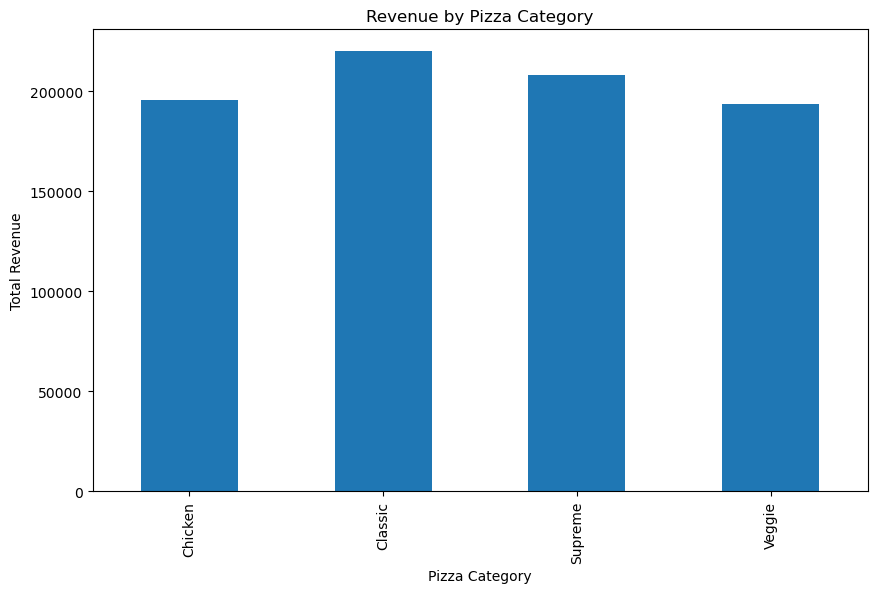

In [73]:
# Calculate total revenue
total_revenue = df['total_price'].sum()
print(f'Total Revenue: {total_revenue}')

# Group by pizza_category and calculate total revenue
revenue_by_category = df.groupby('pizza_category')['total_price'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar')
plt.title('Revenue by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Revenue')
plt.show()

# Customer Behavior

In [76]:
# Group by customer (assuming order_id represents a customer) and count orders
customer_orders = df['order_id'].value_counts()

In [78]:
# Identify repeat customers
repeat_customers = customer_orders[customer_orders > 1].count()
print(f'Number of Repeat Customers: {repeat_customers}')

Number of Repeat Customers: 13149


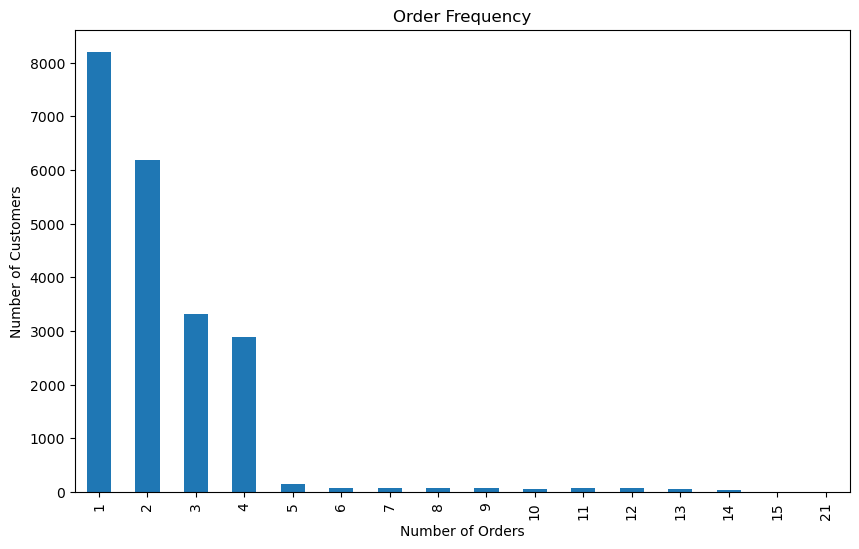

In [80]:
# Plot order frequency
plt.figure(figsize=(10, 6))
customer_orders.value_counts().sort_index().plot(kind='bar')
plt.title('Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Operational Insights

In [83]:
#Analyze peak hours and order processing time.
# Convert order_time to datetime
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time
# Extract hour from order_time
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
# Group by hour and count orders
peak_hours = df['order_hour'].value_counts().sort_index()


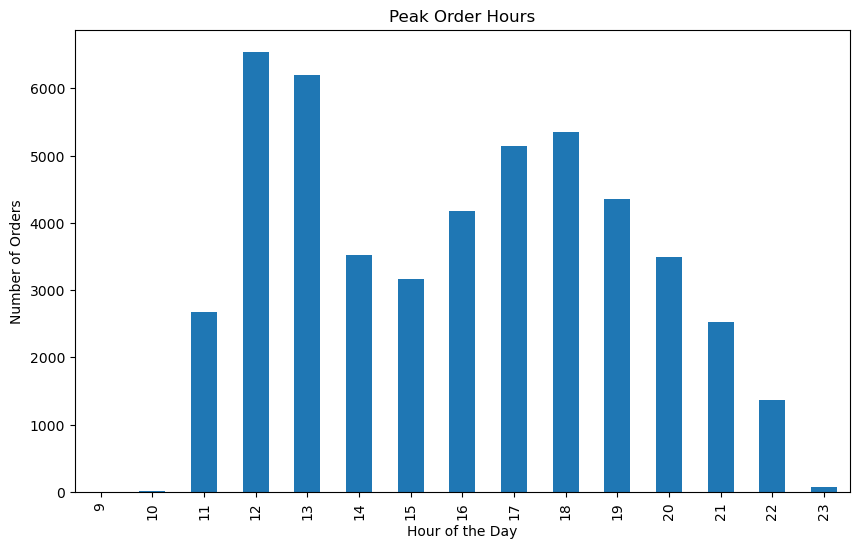

In [85]:
# Plot peak hours
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar')
plt.title('Peak Order Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

# Promotional Impact

In [90]:
#Analyze the impact of promotions on sales.
# Assuming there's a column 'promotion' indicating if a promotion was applied
if 'promotion' in df.columns:
    promotion_sales = df.groupby('promotion')['total_price'].sum()
    print(promotion_sales)

# Customer Segmentation

In [93]:
#Segment customers based on their spending and order frequency.
# Group by order_id and calculate total spending
customer_spending = df.groupby('order_id')['total_price'].sum()

In [95]:
# Segment customers into high-value and low-value
high_value_customers = customer_spending[customer_spending > customer_spending.quantile(0.75)]
low_value_customers = customer_spending[customer_spending <= customer_spending.quantile(0.25)]

In [97]:
print(f'Number of High-Value Customers: {len(high_value_customers)}')
print(f'Number of Low-Value Customers: {len(low_value_customers)}')

Number of High-Value Customers: 5300
Number of Low-Value Customers: 5396


# Product Mix Optimization

In [100]:
#Determine the optimal mix of pizza types, sizes, and categories.
# Group by pizza_name, pizza_size, and pizza_category to find the most profitable combinations
product_mix = df.groupby(['pizza_name', 'pizza_size', 'pizza_category'])['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False).head(10)

print(product_mix)

                      pizza_name pizza_size pizza_category  total_price
85        The Thai Chicken Pizza          L        Chicken     29257.50
20         The Five Cheese Pizza          L         Veggie     26066.50
21         The Four Cheese Pizza          L         Veggie     23622.20
73       The Spicy Italian Pizza          L        Supreme     23011.75
3             The Big Meat Pizza          S        Classic     22968.00
70   The Southwest Chicken Pizza          L        Chicken     21082.00
0     The Barbecue Chicken Pizza          L        Chicken     20584.00
8   The California Chicken Pizza          L        Chicken     19235.25
18      The Classic Deluxe Pizza          M        Classic     18896.00
46            The Mexicana Pizza          L         Veggie     17556.75


# Customer Feedback Analysis

In [105]:
#Analyze customer feedback if available.
# Assuming there's a column 'feedback_score' indicating customer feedback
if 'feedback_score' in df.columns:
    feedback_analysis = df['feedback_score'].value_counts()
    print(feedback_analysis)

#  Geographical Insights

In [108]:
#Analyze regional preferences if location data is available.
if 'location' in df.columns:
    regional_sales = df.groupby('location')['total_price'].sum()
    print(regional_sales)

# Price Sensitivity Analysis

In [111]:
# Group by unit_price and calculate total sales
price_sensitivity = df.groupby('unit_price')['quantity'].sum()

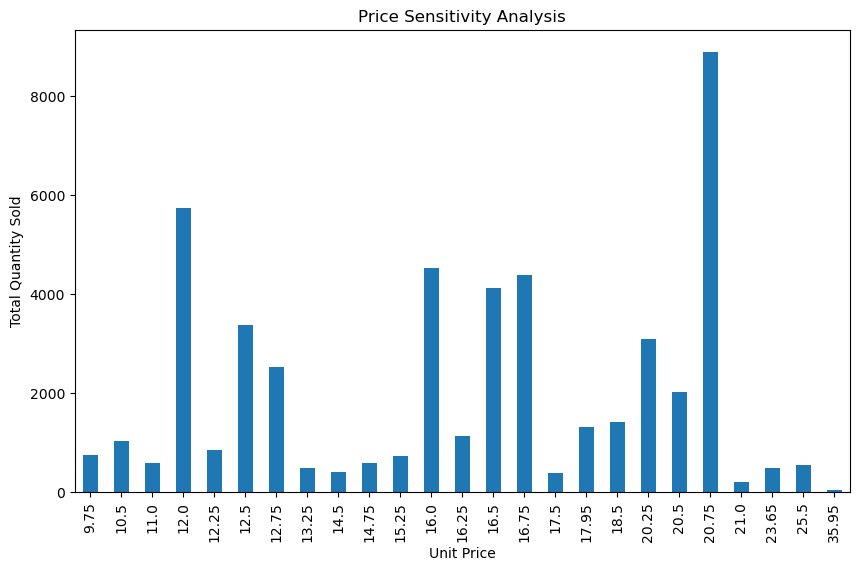

In [113]:
# Plot the results
plt.figure(figsize=(10, 6))
price_sensitivity.plot(kind='bar')
plt.title('Price Sensitivity Analysis')
plt.xlabel('Unit Price')
plt.ylabel('Total Quantity Sold')
plt.show()

# Customer Lifetime Value (CLV)

In [116]:
#Calculate the Customer Lifetime Value if customer data is available.
# Assuming there's a column 'customer_id' indicating unique customers
if 'customer_id' in df.columns:
    customer_lifetime_value = df.groupby('customer_id')['total_price'].sum()
    print(customer_lifetime_value)

# Seasonal Analysis

In [119]:
#Analyze seasonal trends in sales.
# Extract month from order_date
df['month'] = df['order_date'].dt.month

In [121]:
# Group by month and calculate total sales
monthly_sales = df.groupby('month')['total_price'].sum()

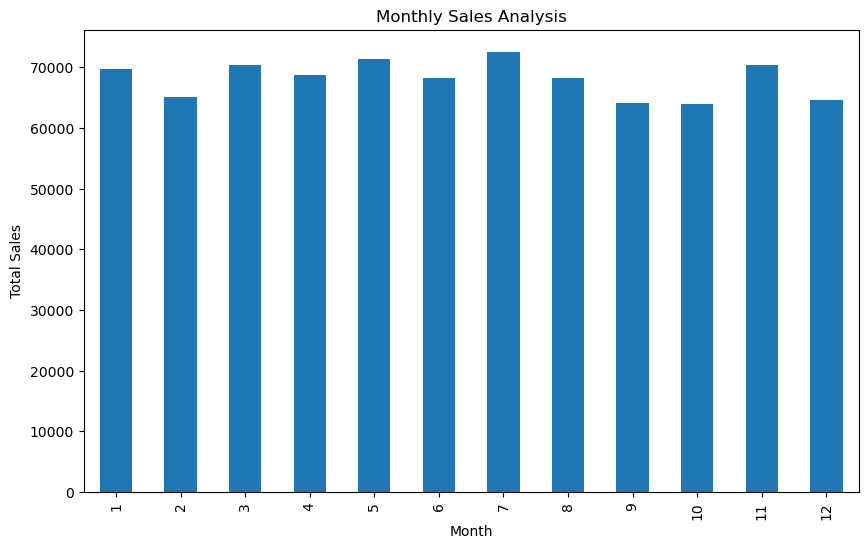

In [123]:
# Plot the results
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#  Customer Retention Analysis

In [126]:
#Analyze customer retention rates.
# Assuming there's a column 'customer_id' indicating unique customers
if 'customer_id' in df.columns:
    customer_retention = df.groupby('customer_id')['order_date'].nunique()
    print(customer_retention)

# Product Performance Over Time

In [129]:
#Analyze how product performance changes over time.
# Group by pizza_name and order_date to analyze product performance
product_performance = df.groupby(['pizza_name', 'order_date'])['quantity'].sum().reset_index()

In [131]:
# Plot the results for a specific pizza
specific_pizza = 'The Hawaiian Pizza'
specific_pizza_data = product_performance[product_performance['pizza_name'] == specific_pizza]

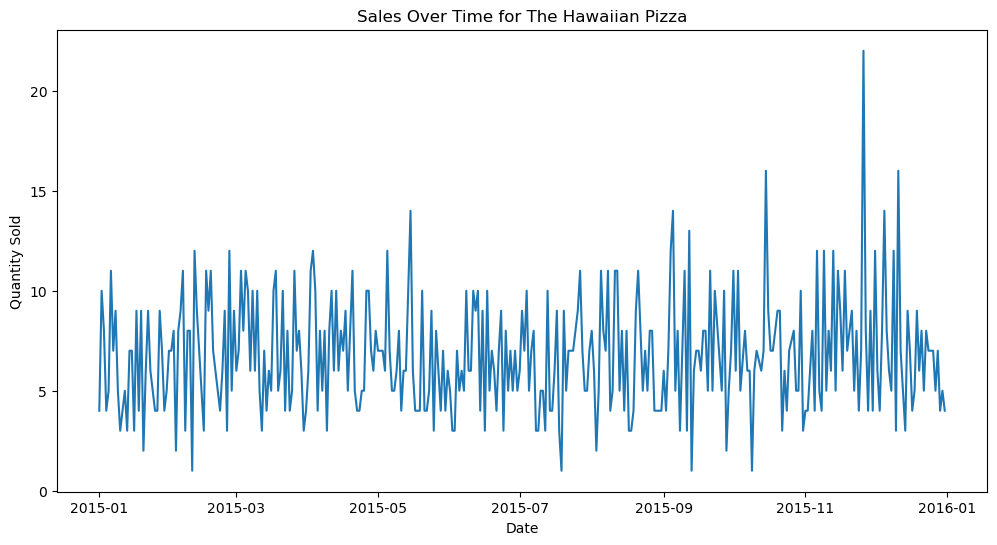

In [133]:
plt.figure(figsize=(12, 6))
plt.plot(specific_pizza_data['order_date'], specific_pizza_data['quantity'])
plt.title(f'Sales Over Time for {specific_pizza}')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

In [135]:
print(specific_pizza_data)

              pizza_name order_date  quantity
4072  The Hawaiian Pizza 2015-01-01         4
4073  The Hawaiian Pizza 2015-01-02        10
4074  The Hawaiian Pizza 2015-01-03         8
4075  The Hawaiian Pizza 2015-01-04         4
4076  The Hawaiian Pizza 2015-01-05         5
...                  ...        ...       ...
4425  The Hawaiian Pizza 2015-12-27         5
4426  The Hawaiian Pizza 2015-12-28         7
4427  The Hawaiian Pizza 2015-12-29         4
4428  The Hawaiian Pizza 2015-12-30         5
4429  The Hawaiian Pizza 2015-12-31         4

[358 rows x 3 columns]


In [137]:
print(df)

       pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_category  \
0           13.25        13